In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import os

In [3]:
os.getcwd()

'/home/kkn01/MONAS'

In [4]:
os.listdir()

['XGB_Hyperparameter.ipynb',
 'Data',
 'Test_DL_Regression.ipynb',
 'test_pycaret-etr-tuned.ipynb',
 'logs.log',
 'model.json',
 'XGB_Hyperparameter_noShuffle.ipynb',
 'Extratreesregressor-default.ipynb',
 'RandomForest.ipynb',
 'RandomForest-tuned.ipynb',
 'rf_default.pkl',
 'testing4.ipynb',
 'test_h2o.ipynb',
 'Extratreesregressor-default-96001.ipynb',
 'etr_tuned_dikit.pkl',
 'h.ipynb']

In [5]:
df = pd.read_csv('./Data/data_fix_temp.txt')

In [6]:
df

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
1,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.433260,12.4580,...,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2
2,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.049010,27.2450,...,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0
3,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.045560,37.3569,...,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6
4,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.225080,20.1816,...,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8
5,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.342680,14.7934,...,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544270,2023-04-12 03:00:00,99992,0.003601,0.000000e+00,0,29.7642,23.4001,68.8035,3.721340,261.5040,...,-4.69787,73.0758,2.29511,231.9670,0,12,-6.30253,106.75640,41,31.8
544271,2023-04-12 06:00:00,99992,3.669660,7.573590e-21,0,30.7901,24.1140,67.7143,5.811930,263.9440,...,-4.63960,75.7922,2.05083,268.5790,0,12,-6.30253,106.75640,41,35.0
544272,2023-04-12 09:00:00,99992,4.045040,2.640270e-09,0,28.8450,24.1964,76.1178,5.839920,268.8950,...,-4.40575,77.1489,2.52709,272.9220,0,12,-6.30253,106.75640,41,30.6
544273,2023-04-12 12:00:00,99992,0.000000,0.000000e+00,0,25.8334,23.9709,89.6050,0.500122,210.7490,...,-4.33471,76.3170,3.07955,259.2500,1,12,-6.30253,106.75640,41,28.4


In [41]:
X = df.drop(columns=['t_obs','Date', 'hari', 'LAT', 'LON', 'UTC', 'sha_prec.mm.', 'con_prec.mm.', 'mic_prec.mm.']) 
y = df['t_obs']

In [42]:
df.shape[0]

544274

In [43]:
train = X[:int(X.shape[0] * 0.8)]
y_tr = y[:int(y.shape[0] * 0.8)]
# test = X[int(X.shape[0] * 0.9):int(X.shape[0] * 0.95)]
val = X[int(X.shape[0] * 0.8):]
y_val = y[int(y.shape[0] * 0.8):]

In [44]:
print(f'Train size : {train.shape[0]}')
# print(f'Test size : {test.shape[0]}')
print(f'Validation size : {val.shape[0]}')

Train size : 435419
Validation size : 108855


In [45]:
X_train, X_test, y_train, y_test = train_test_split(train, y_tr, test_size=0.1, random_state=42, shuffle=False)

In [46]:
from xgboost import XGBRegressor
# import xgboost

In [47]:
X_train

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
1,96001,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.000000,0.000000,100564.0,...,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841,126
2,96001,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.000000,0.000000,100481.0,...,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813,126
3,96001,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.000000,0.000000,100265.0,...,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222,126
4,96001,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.000000,0.000000,100462.0,...,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942,126
5,96001,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.000000,0.000000,100667.0,...,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391873,97236,25.7509,23.2250,86.0894,4.80729,126.3900,0.772281,0.765850,0.120673,100050.0,...,124.3450,14.5623,92.7920,4.824370,104.9910,-4.55094,67.6037,7.35052,87.5906,25
391874,97236,23.9570,21.8922,88.3833,3.07839,76.5107,0.931197,0.755701,0.174986,100173.0,...,128.6690,14.7560,90.5543,3.792200,94.7513,-5.29697,71.7034,6.35654,85.0998,25
391875,97236,25.3205,22.4543,84.2929,3.98045,109.6560,0.678044,0.594871,0.000147,100121.0,...,118.4460,14.6897,86.9928,3.354980,118.1880,-4.92604,63.1848,7.29206,73.6982,25
391876,97236,26.9994,23.2281,79.9836,6.18615,131.0340,0.769220,0.668381,0.113971,100035.0,...,128.6870,14.4835,91.6651,4.410970,93.1907,-5.00521,66.3692,7.34255,73.0027,25


In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [52]:
X_train_scaled

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
0,-1.567050,0.385602,-0.590669,-0.937480,0.625429,-1.719115,-0.170774,-1.699332,-1.280326,0.388620,...,-1.780183,2.266744,-4.603036,-1.327922,1.020496,-0.102914,-2.848932,0.337814,-0.997147,0.135161
1,-1.567050,0.248673,-0.638038,-0.832280,0.385352,-1.569914,0.148435,-1.699332,-1.280326,0.357055,...,-1.636236,2.741735,-4.882719,-1.367044,0.690255,0.099390,-2.769826,0.244652,-0.970098,0.135161
2,-1.567050,0.092879,-0.687359,-0.706562,-0.241600,-1.467886,0.430446,-1.699332,-1.280326,0.274910,...,-1.552309,2.570701,-4.913946,-1.308522,0.432347,0.315910,-2.645758,0.635915,-0.887266,0.135161
3,-1.567050,0.052220,-0.625431,-0.618415,-0.129436,-1.641184,0.358975,-1.699332,-1.280326,0.349830,...,-1.664022,1.988765,-4.780067,-1.422601,-0.719450,0.556596,-2.593726,0.819832,-0.907892,0.135161
4,-1.567050,0.147819,-0.715580,-0.784096,-0.055960,-1.695551,0.095238,-1.699332,-1.280326,0.427791,...,-1.663755,1.923358,-4.776314,-1.010711,-0.533079,0.664774,-2.459385,1.327585,-0.817635,0.135161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391872,1.638502,-0.194978,0.263395,0.363525,1.483917,-0.569544,0.631793,0.690099,-0.868063,0.193146,...,-0.615824,-1.067293,1.005819,0.068945,-0.882442,0.788810,-0.081571,0.748578,-0.658565,-0.311781
391873,1.638502,-0.827571,-0.439648,0.558735,0.403708,-1.072825,1.215503,0.658435,-0.682510,0.239923,...,-0.570758,-0.811863,0.832301,-0.286429,-0.992760,-0.222274,0.119179,0.386377,-0.686671,-0.311781
391874,1.638502,-0.346752,-0.143144,0.210643,0.967311,-0.738389,0.285653,0.156649,-1.279826,0.220147,...,-0.677304,-0.899292,0.556130,-0.436963,-0.740264,0.280442,-0.297952,0.727276,-0.815322,-0.311781
391875,1.638502,0.245288,0.265030,-0.156077,2.345423,-0.522686,0.620550,0.385999,-0.890960,0.187441,...,-0.570571,-1.171205,0.918436,-0.073388,-1.009573,0.173144,-0.142021,0.745674,-0.823170,-0.311781


In [53]:
X_train.describe()

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
count,391877.000000,391877.000000,391877.000000,391877.000000,391877.000000,391877.000000,391877.000000,391877.000000,391877.000000,391877.000000,...,391877.000000,391877.000000,391877.000000,391877.000000,391877.000000,391877.000000,391877.000000,391877.000000,391877.000000,391877.00000
mean,96604.735807,26.303816,22.725667,81.817648,2.432246,182.836488,0.600274,0.544662,0.374763,99542.123255,...,183.432936,15.371660,79.820937,4.624123,186.899444,-5.132965,69.269546,5.296218,145.955380,95.45635
std,385.269510,2.835790,1.895762,11.750931,1.600525,99.108385,0.272252,0.320516,0.292709,2629.501865,...,95.949544,0.758331,12.896035,2.904468,92.820273,0.737853,20.421941,2.744274,88.624241,225.98049
min,96001.000000,13.537600,5.484120,30.371400,0.003070,0.001434,0.000000,0.000000,0.000000,86506.700000,...,0.003052,11.560900,2.012670,0.013710,0.168555,-8.813010,0.000047,0.089455,0.277085,0.00000
25%,96207.000000,24.200700,21.949200,73.721900,1.231300,101.684000,0.424350,0.302484,0.070479,99596.700000,...,106.246000,14.862500,74.088800,2.504930,99.300900,-5.615930,58.493400,3.198640,80.841200,4.00000
50%,96651.000000,26.423200,23.143600,82.890400,2.100100,184.055000,0.635174,0.574958,0.369954,100511.000000,...,178.940000,15.342200,82.313800,4.034110,201.182000,-5.142560,73.458200,4.923830,107.747000,15.00000
75%,96939.000000,28.452400,24.016700,91.157500,3.298040,265.310000,0.810413,0.815228,0.623164,100782.000000,...,267.130000,15.852400,88.577100,6.069340,268.336000,-4.662820,84.729200,6.999930,222.663000,43.00000
max,97236.000000,36.192300,27.035500,100.000000,13.853000,359.998000,1.000000,1.000000,1.000000,101575.000000,...,359.998000,19.818500,100.000000,25.172400,359.799000,-1.583760,100.000000,23.730800,359.682000,1420.00000


In [54]:
X_train_scaled.describe()

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
count,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,...,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05,3.918770e+05
mean,8.076620e-16,-4.048754e-15,-1.477595e-15,1.636212e-15,-2.239637e-16,1.740651e-18,1.572388e-16,-2.251242e-16,-4.525692e-17,4.548901e-16,...,1.769662e-16,-8.515554e-15,2.456639e-15,-2.016254e-17,5.036283e-16,-8.598815e-16,6.916186e-16,-5.365556e-16,-3.127369e-16,-3.249215e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.567050e+00,-4.501825e+00,-9.094798e+00,-4.378063e+00,-1.517738e+00,-1.844801e+00,-2.204852e+00,-1.699332e+00,-1.280326e+00,-4.957380e+00,...,-1.911735e+00,-5.025201e+00,-6.033511e+00,-1.587354e+00,-2.011749e+00,-4.987514e+00,-3.391920e+00,-1.897322e+00,-1.643777e+00,-4.224102e-01
25%,-1.032359e+00,-7.416339e-01,-4.095808e-01,-6.889461e-01,-7.503456e-01,-8.188267e-01,-6.461831e-01,-7.555899e-01,-1.039545e+00,2.075557e-02,...,-8.044544e-01,-6.714230e-01,-4.444889e-01,-7.296329e-01,-9.437449e-01,-6.545558e-01,-5.276756e-01,-7.643483e-01,-7.347229e-01,-4.047096e-01
50%,1.200828e-01,4.209923e-02,2.204570e-01,9.129093e-02,-2.075232e-01,1.229476e-02,1.281888e-01,9.452148e-02,-1.642802e-02,3.684645e-01,...,-4.682609e-02,-3.884877e-02,1.933049e-01,-2.031399e-01,1.538734e-01,-1.300409e-02,2.051059e-01,-1.356967e-01,-4.311284e-01,-3.560327e-01
75%,8.676124e-01,7.576679e-01,6.810113e-01,7.948191e-01,5.409445e-01,8.321558e-01,7.718544e-01,8.441572e-01,8.486301e-01,4.715259e-01,...,8.723040e-01,6.339454e-01,6.789819e-01,4.975848e-01,8.773585e-01,6.371808e-01,7.570130e-01,6.208250e-01,8.655388e-01,-2.321281e-01
max,1.638502e+00,3.487034e+00,2.273408e+00,1.547314e+00,7.135637e+00,1.787555e+00,1.468221e+00,1.420641e+00,2.136040e+00,7.731044e-01,...,1.840189e+00,5.863991e+00,1.564751e+00,7.074722e+00,1.862737e+00,4.810188e+00,1.504778e+00,6.717481e+00,2.411608e+00,5.861326e+00


In [55]:
y_train

1         23.2
2         23.0
3         21.6
4         19.8
5         28.4
          ... 
391873    25.1
391874    24.8
391875    25.2
391876    27.9
391877    28.0
Name: t_obs, Length: 391877, dtype: float64

In [56]:
model = XGBRegressor( verbosity=2, n_jobs=-1, colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight = 2, n_estimators=160,
                     random_state=6601, reg_alpha=0.3, scale_pos_weight=13.200000000000003)
model_scaled = XGBRegressor(verbosity=2, n_jobs=-1, colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight = 2, n_estimators=160,
                     random_state=6601, reg_alpha=0.3, scale_pos_weight=13.200000000000003)

In [57]:
model.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'gamma': None,
 'gpu_id': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_delta_step': None,
 'max_depth': 9,
 'min_child_weight': 2,
 'monotone_constraints': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 6601,
 'reg_alpha': 0.3,
 'reg_lambda': None,
 'scale_pos_weight': 13.200000000000003,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 2}

In [58]:
model.fit(X_train, y_train)
model_scaled.fit(X_train_scaled, y_train)

[14:34:38] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[14:34:38] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 312 extra nodes, 0 pruned nodes, max_depth=9
[14:34:38] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 290 extra nodes, 0 pruned nodes, max_depth=9
[14:34:38] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 390 extra nodes, 0 pruned nodes, max_depth=9
[14:34:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 466 extra nodes, 0 pruned nodes, max_depth=9
[14:34:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 538 extra nodes, 0 pruned nodes, max_depth=9
[14:34:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 748 extra nodes, 0 pruned nodes, max_depth=9
[14:34:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 844 extra nodes, 0 pruned nodes, max_depth=9
[14:34:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 932 extra nodes, 0 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=9, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=160, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=6601,
             reg_alpha=0.3, reg_lambda=1, scale_pos_weight=13.200000000000003,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=2)

In [59]:
y_pred = model.predict(X_test)
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}\n')

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print('Dengan Scaling')
print(f'Mean Squared Error: {mse_scaled}')
print(f'Mean Absolute Error: {mae_scaled}')
print(f'R2 Score: {r2_scaled}')

Tanpa Scaling
Mean Squared Error: 2.997787319894134
Mean Absolute Error: 1.3185097612394385
R2 Score: 0.7281663160887107

Dengan Scaling
Mean Squared Error: 2.9260756482998533
Mean Absolute Error: 1.297932641375109
R2 Score: 0.7346689948276408


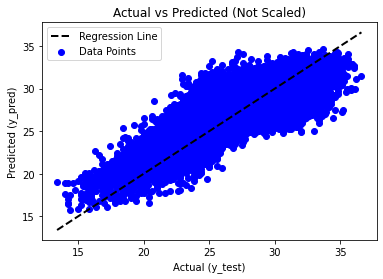

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_test), min(y_pred))
y_max = max(max(y_test), max(y_pred))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Not Scaled)')
plt.legend()

plt.show()


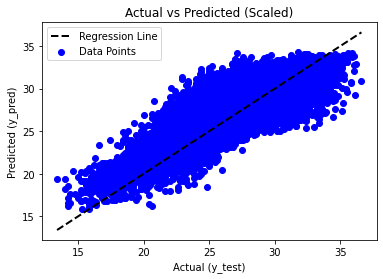

In [62]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_scaled, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_test), min(y_pred_scaled))
y_max = max(max(y_test), max(y_pred_scaled))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Scaled)')
plt.legend()

plt.show()


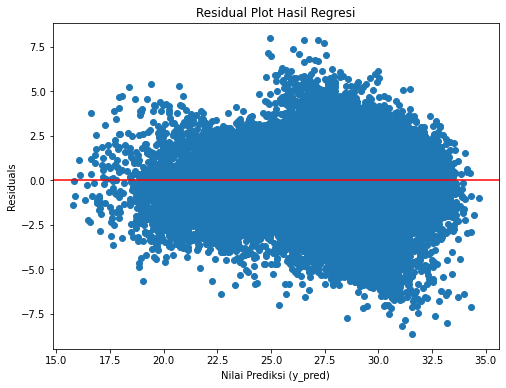

In [63]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Nilai Prediksi (y_pred)")
plt.ylabel("Residuals")
plt.title("Residual Plot Hasil Regresi")
plt.show()

In [64]:
X_test.columns

Index(['lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.',
       'wdir.deg.', 'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.',
       'clmix.kg.kg.', 'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.',
       'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.',
       'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.',
       't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.', 'ELEV'],
      dtype='object')

In [65]:
val

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
435420,97378,29.8222,16.0221,43.3802,9.620180,110.2320,0.000000,0.000000,0.000000,99931.2,...,108.1040,14.1490,51.3741,11.52180,73.2636,-4.33181,2.27077,4.26774,237.845,141
435421,97378,27.3410,17.3331,54.4635,9.375300,104.7090,0.000000,0.000000,0.000000,99972.4,...,102.4000,14.9304,45.4825,9.82500,69.9017,-4.20420,4.12294,3.63434,230.599,141
435422,97378,24.9314,20.5364,76.7173,7.142340,92.5274,0.713963,0.000000,0.000000,100262.0,...,92.8010,14.1066,60.4210,12.02170,81.1958,-3.98435,18.36510,4.94887,294.620,141
435423,97378,24.3937,20.6126,79.5986,5.959310,90.8481,0.332491,0.000000,0.000000,100109.0,...,89.4659,14.5303,56.3369,12.85770,83.9015,-4.19079,21.79230,6.11776,301.578,141
435424,97378,24.0305,20.4877,80.7293,5.049740,90.1197,0.295602,0.145177,0.000000,100213.0,...,88.2740,14.1282,53.6119,13.45710,75.8116,-4.11705,26.40760,6.25179,297.216,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544270,99992,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,...,257.7270,15.4080,86.8257,6.48475,260.4710,-4.69787,73.07580,2.29511,231.967,41
544271,99992,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,...,256.4770,15.5844,86.8180,7.01409,248.4170,-4.63960,75.79220,2.05083,268.579,41
544272,99992,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,...,257.0560,15.7292,83.2283,8.06828,248.2330,-4.40575,77.14890,2.52709,272.922,41
544273,99992,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,...,239.4350,15.8302,80.2176,7.67518,256.2960,-4.33471,76.31700,3.07955,259.250,41


In [66]:
y_val

435420    29.0
435421    28.0
435422    26.0
435423    26.0
435424    25.2
          ... 
544270    31.8
544271    35.0
544272    30.6
544273    28.4
544274    26.0
Name: t_obs, Length: 108855, dtype: float64

In [67]:
y_val_pred = model.predict(val)

In [68]:
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse_val}')
print(f'Mean Absolute Error: {mae_val}')
print(f'R2 Score: {r2_val}\n')

Tanpa Scaling
Mean Squared Error: 3.4461717911374863
Mean Absolute Error: 1.46652751367513
R2 Score: 0.6622552842140994



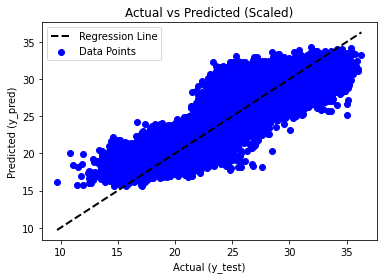

In [69]:
import matplotlib.pyplot as plt

plt.scatter(y_val, y_val_pred, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_val), min(y_val_pred))
y_max = max(max(y_val), max(y_val_pred))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Scaled)')
plt.legend()


In [70]:
#OUTPUT

combined = pd.concat([df[['Date', 'lokasi', 'suhu2m.degC.', 'LON','LAT','ELEV']],y_val, pd.Series(y_val_pred, index = val.index)], axis=1)
combined.columns = ['Date', 'lokasi', 'suhu2m.degC.', 'LON','LAT','ELEV', 't_obs', 'Prediction']
combined = combined.dropna()
combined.tail(15)

,Date,lokasi,suhu2m.degC.,LON,LAT,ELEV,t_obs,Prediction
544260,2023-04-05 09:00:00,99992,29.1739,106.7564,-6.30253,41,35.4,29.862541
544261,2023-04-10 00:00:00,99992,24.9934,106.7564,-6.30253,41,25.6,25.416363
544262,2023-04-10 03:00:00,99992,30.2816,106.7564,-6.30253,41,26.4,30.746828
544263,2023-04-10 06:00:00,99992,31.1585,106.7564,-6.30253,41,30.6,31.746643
544264,2023-04-10 09:00:00,99992,30.3046,106.7564,-6.30253,41,31.4,31.309710
544265,2023-04-11 00:00:00,99992,24.3057,106.7564,-6.30253,41,26.5,24.781164
544266,2023-04-11 03:00:00,99992,30.3986,106.7564,-6.30253,41,32.0,31.233179
544267,2023-04-11 06:00:00,99992,31.1714,106.7564,-6.30253,41,33.2,32.261494
544268,2023-04-11 09:00:00,99992,30.2010,106.7564,-6.30253,41,29.8,31.604864
544269,2023-04-12 00:00:00,99992,25.1158,106.7564,-6.30253,41,25.8,25.358246


In [71]:
combined.head(15)

,Date,lokasi,suhu2m.degC.,LON,LAT,ELEV,t_obs,Prediction
435420,2021-09-08 06:00:00,97378,29.8222,123.0739,-10.76662,141,29.0,30.927856
435421,2021-09-08 09:00:00,97378,27.3410,123.0739,-10.76662,141,28.0,28.298962
435422,2021-09-08 15:00:00,97378,24.9314,123.0739,-10.76662,141,26.0,26.197748
435423,2021-09-08 18:00:00,97378,24.3937,123.0739,-10.76662,141,26.0,25.434189
435424,2021-09-08 21:00:00,97378,24.0305,123.0739,-10.76662,141,25.2,24.532404
435425,2021-09-09 00:00:00,97378,28.2813,123.0739,-10.76662,141,27.6,29.503601
435426,2021-09-09 03:00:00,97378,29.8216,123.0739,-10.76662,141,30.6,31.081326
435427,2021-09-09 06:00:00,97378,29.4383,123.0739,-10.76662,141,29.4,30.610620
435428,2021-09-09 09:00:00,97378,26.7277,123.0739,-10.76662,141,27.8,27.728540
435429,2021-09-09 15:00:00,97378,25.3455,123.0739,-10.76662,141,26.4,25.070747


In [72]:
combined.shape

(108855, 8)

In [74]:
model.save_model("xgb_tuned_08_noShuffle_2.json")